# Wine quality prediction with TensorFlow. Part 1

# Preprocessing

Code Created by Luis Enrique Acevedo Galicia

Date: 2019-10-03

Here, I present a simple and easy way to create a machine learning algorithm, which is able to predict wine quality. There are 11 inputs and one target. In this part, only the preprocessing data is presented. The Machine learnig analysis (RNN) with Tensorflow can be found in part 2.

The data set was obtained from https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/data


# Preprocessing the data

# The Libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# Get the data

In [3]:
#Load the data
data = pd.read_csv('winequality-red.csv')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Verifying that data is completed

In [4]:
data[pd.isnull(data['quality'])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


learning about this data set

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Know the data

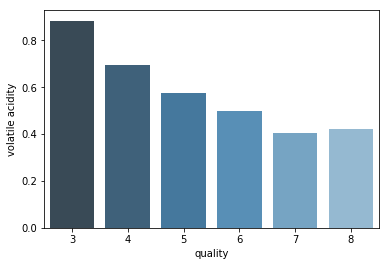

In [18]:
#The fixed acidity Vs the Quality.
Fig = plt.figure()
sns.barplot(x = 'quality', y = 'volatile acidity', data=data, palette="Blues_d", ci=None)

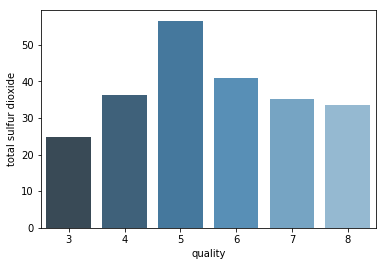

In [19]:
#The fixed acidity Vs the Quality.
Fig = plt.figure()
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data=data, palette="Blues_d", ci=None)

# Shuffle all data

In [5]:
#Define inputs and targets
Inputs_unscaled = data[{'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH', 'sulphates','alcohol'}].as_matrix(columns=None)
Targets_unscaled = data['quality'].as_matrix(columns=None)
Targets_unscaled=np.reshape(Targets_unscaled, (1599,1))

Inputs_unscaled=np.reshape(Inputs_unscaled, (1599,11))


#Scale the inputs and outputs
Inputs_scaled = Inputs_unscaled
Targets_scaled = Targets_unscaled
#Inputs_scaled = preprocessing.scale(Inputs_unscaled)
#Targets_scaled = preprocessing.scale(Targets_unscaled)



#Shuffle data to randomly spread dataset
Idx_shuffle = np.arange(Inputs_scaled.shape[0])
np.random.shuffle(Idx_shuffle)

Inputs_shuffle = Inputs_scaled[Idx_shuffle]
Targets_shuffle = Targets_scaled[Idx_shuffle]

/home/bwayne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/bwayne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Create data sets for: Train, validation and test

In [6]:
#total number of samples
Tsample = Inputs_shuffle.shape[0]

#define percentage of samples
Train = 0.80
Valid = 0.10


Train_samples = int(Train*Tsample)
Valid_samples = int(Valid*Tsample)
Test_samples = Tsample-Train_samples-Valid_samples

#define Train data set
Inputs_Train = Inputs_shuffle[:Train_samples]
Targets_Train = Targets_shuffle[:Train_samples]

#define Validation data set
Inputs_Valid = Inputs_shuffle[Train_samples:Train_samples+Valid_samples]
Targets_Valid = Targets_shuffle[Train_samples:Train_samples+Valid_samples]


#define Test data set
Inputs_Test = Inputs_shuffle[Train_samples+Valid_samples:]
Targets_Test = Targets_shuffle[Train_samples+Valid_samples:]

#Verify results

print("Total Train samples are %s " %(Train_samples))
print("\n")
print("Total Validation samples are %s" %(Valid_samples))
print("\n")
print("Total Test samples are %s" %(Test_samples))




Total Train samples are 1279 


Total Validation samples are 159


Total Test samples are 161


# Create data sets in format *.npz

In [7]:
np.savez('WINE_data_Train', inputs=Inputs_Train, targets=Targets_Train)
np.savez('WINE_data_Valid', inputs=Inputs_Valid, targets=Targets_Valid)
np.savez('WINE_data_Test', inputs=Inputs_Test, targets=Targets_Test)